# Task 1: Verify Anaconda Installation

To verify that Anaconda is installed and working, 
we ran the following commands in this Jupyter Notebook:

- `!conda info`

The output confirms that the base environment is active, 
and all necessary packages are available.

In [2]:
!conda info


     active environment : base
    active env location : D:\Anaconda
            shell level : 1
       user config file : C:\Users\39346\.condarc
 populated config files : D:\Anaconda\.condarc
          conda version : 25.7.0
    conda-build version : not installed
         python version : 3.13.5.final.0
                 solver : libmamba (default)
       virtual packages : __archspec=1=skylake
                          __conda=25.7.0=0
                          __cuda=13.0=0
                          __win=10.0.26100=0
       base environment : D:\Anaconda  (writable)
      conda av data dir : D:\Anaconda\etc\conda
  conda av metadata url : None
           channel URLs : https://repo.anaconda.com/pkgs/main/win-64
                          https://repo.anaconda.com/pkgs/main/noarch
                          https://repo.anaconda.com/pkgs/r/win-64
                          https://repo.anaconda.com/pkgs/r/noarch
                          https://repo.anaconda.com/pkgs/msys2/win-64
  

# Task 2: Linear Algebra Equivalents

In this task, we reproduced the commands from the *Linear Algebra Equivalents* table in **NumPy for MATLAB Users** using Jupyter Notebook. The goal is to demonstrate how common MATLAB operations for arrays and matrices can be carried out in Python with NumPy and SciPy.  

All commands were executed on sample matrices and vectors defined in the notebook. The outputs confirm that NumPy and SciPy provide functionality equivalent to MATLAB, allowing seamless transition for linear algebra and matrix computation tasks.  

Below we include the code cells and their corresponding outputs as evidence of successful execution.


### Setup (imports, printing options, base arrays)

In [3]:

import numpy as np
import scipy.linalg as LA
from numpy.random import default_rng
from scipy import signal
from scipy.sparse.linalg import eigs, cg

np.set_printoptions(suppress=True, precision=4)
rng = default_rng(42)

# Some reusable arrays
A = np.array([[1., 2., 3.],[4., 5., 6.]])
B = np.array([[7., 8., 9.],[1., 3., 5.]])
M = np.array([[2., -1., 0.],[-1., 2., -1.],[0., -1., 2.]])
N = np.array([[3., 1., 0.],[1., 3., 1.],[0., 1., 3.]])
v = np.array([1., 2., 3.])
b = np.array([1., 2., 1.])
print("A=\n", A, "\nB=\n", B, "\nM=\n", M, "\nN=\n", N, "\nv=", v, "\nb=", b)


A=
 [[1. 2. 3.]
 [4. 5. 6.]] 
B=
 [[7. 8. 9.]
 [1. 3. 5.]] 
M=
 [[ 2. -1.  0.]
 [-1.  2. -1.]
 [ 0. -1.  2.]] 
N=
 [[3. 1. 0.]
 [1. 3. 1.]
 [0. 1. 3.]] 
v= [1. 2. 3.] 
b= [1. 2. 1.]


### ndims(a)  
**NumPy:** `np.ndim(a) or a.ndim`

In [4]:
print('ndim(A)=', np.ndim(A)); print('A.ndim=', A.ndim)

ndim(A)= 2
A.ndim= 2


### numel(a)  
**NumPy:** `np.size(a) or a.size`

In [5]:
print('numel(A)=', np.size(A)); print('A.size=', A.size)

numel(A)= 6
A.size= 6


### size(a)  
**NumPy:** `np.shape(a) or a.shape`

In [6]:
print('shape(A)=', np.shape(A)); print('A.shape=', A.shape)

shape(A)= (2, 3)
A.shape= (2, 3)


### size(a,n)  
**NumPy:** `a.shape[n-1] (MATLAB 1-based vs Python 0-based)`

In [7]:
print('size(A,1)->', A.shape[0]); print('size(A,2)->', A.shape[1])

size(A,1)-> 2
size(A,2)-> 3


### [1 2 3; 4 5 6]  
**NumPy:** `np.array([[1.,2.,3.],[4.,5.,6.]])`

In [8]:
C = np.array([[1.,2.,3.],[4.,5.,6.]]); print('C=\n', C)

C=
 [[1. 2. 3.]
 [4. 5. 6.]]


### [a b; c d]  
**NumPy:** `np.block([[a,b],[c,d]])`

In [9]:
a = np.array([[1., 2.]]); b2 = np.array([[3., 4.]]); c = np.array([[5., 6.]]); d = np.array([[7., 8.]]); blk = np.block([[a, b2],[c, d]]); print('block=\n', blk)

block=
 [[1. 2. 3. 4.]
 [5. 6. 7. 8.]]


### a(end)  
**NumPy:** `a[-1] (for 1-D array)`

In [10]:
x = np.array([10,20,30,40,50]); print('x[-1]=', x[-1])

x[-1]= 50


### a(2,5)  
**NumPy:** `a[1,4]`

In [11]:
E = np.arange(1,26).reshape(5,5); print('E=\n', E); print('E[1,4]=', E[1,4])

E=
 [[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]]
E[1,4]= 10


### a(2,:)  
**NumPy:** `a[1] or a[1,:]`

In [12]:
print('E[1]=', E[1])

E[1]= [ 6  7  8  9 10]


### a(1:5,:)  
**NumPy:** `a[0:5] or a[:5] or a[0:5,:]`

In [13]:
print('E[0:5,:]=\n', E[0:5,:])

E[0:5,:]=
 [[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]]


### a(end-4:end,:)  
**NumPy:** `a[-5:]`

In [14]:
print('E[-5:,:]=\n', E[-5:,:])

E[-5:,:]=
 [[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]]


### a(1:3,5:9)  
**NumPy:** `a[0:3,4:9]`

In [15]:
E2 = np.arange(1,101).reshape(10,10); print('E2[0:3,4:9]=\n', E2[0:3,4:9])

E2[0:3,4:9]=
 [[ 5  6  7  8  9]
 [15 16 17 18 19]
 [25 26 27 28 29]]


### a([2,4,5],[1,3])  
**NumPy:** `a[np.ix_([1,3,4],[0,2])]`

In [16]:
print('Advanced sel=\n', E2[np.ix_([1,3,4],[0,2])])

Advanced sel=
 [[11 13]
 [31 33]
 [41 43]]


### a(3:2:21,:)  
**NumPy:** `a[2:21:2,:]`

In [17]:
E3 = np.arange(1,116).reshape(23,5); print('shape', E3[2:21:2,:].shape)

shape (10, 5)


### a(1:2:end,:)  
**NumPy:** `a[::2,:]`

In [18]:
print('shape', E3[::2,:].shape)

shape (12, 5)


### a(end:-1:1,:) or flipud(a)  
**NumPy:** `a[::-1,:]`

In [19]:
print('flip rows=\n', E[::-1,:])

flip rows=
 [[21 22 23 24 25]
 [16 17 18 19 20]
 [11 12 13 14 15]
 [ 6  7  8  9 10]
 [ 1  2  3  4  5]]


### a([1:end 1],:)  
**NumPy:** `a[np.r_[:len(a),0]]`

In [20]:
F = np.arange(1,13).reshape(4,3); print('F=\n', F); print('F with first row appended=\n', F[np.r_[:len(F),0],:])

F=
 [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
F with first row appended=
 [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]
 [ 1  2  3]]


### a.'  
**NumPy:** `a.transpose() or a.T`

In [21]:
print('A.T=\n', A.T)

A.T=
 [[1. 4.]
 [2. 5.]
 [3. 6.]]


### a' (conjugate transpose)  
**NumPy:** `a.conj().T`

In [22]:
Z = np.array([[1+2j,2-1j],[3+0j,4+5j]]); print('Z.conj().T=\n', Z.conj().T)

Z.conj().T=
 [[1.-2.j 3.-0.j]
 [2.+1.j 4.-5.j]]


### a * b (matrix multiply)  
**NumPy:** `a @ b`

In [23]:
G = np.array([[1.,2.],[3.,4.]]); H = np.array([[5.,6.],[7.,8.]]); print('G@H=\n', G@H)

G@H=
 [[19. 22.]
 [43. 50.]]


### a .* b  
**NumPy:** `a * b`

In [24]:
print('G*H=\n', G*H)

G*H=
 [[ 5. 12.]
 [21. 32.]]


### a./b  
**NumPy:** `a/b`

In [25]:
print('G/H=\n', G/H)

G/H=
 [[0.2    0.3333]
 [0.4286 0.5   ]]


### a.^3  
**NumPy:** `a**3`

In [26]:
print('G**3=\n', G**3)

G**3=
 [[ 1.  8.]
 [27. 64.]]


### (a > 0.5)  
**NumPy:** `(a > 0.5)`

In [27]:
print('(G>0.5)=\n', (G>0.5))

(G>0.5)=
 [[ True  True]
 [ True  True]]


### find(a > 0.5)  
**NumPy:** `np.nonzero(a > 0.5)`

In [28]:
print('nonzero indices=', np.nonzero(G>0.5))

nonzero indices= (array([0, 0, 1, 1]), array([0, 1, 0, 1]))


### a(:,find(v > 0.5))  
**NumPy:** `a[:, np.nonzero(v>0.5)[0]]`

In [29]:
A2 = np.arange(1.,13.).reshape(3,4); vcol = np.array([0.4,0.6,0.9,0.2]); cols = np.nonzero(vcol>0.5)[0]; print('A2[:,cols]=\n', A2[:,cols])

A2[:,cols]=
 [[ 2.  3.]
 [ 6.  7.]
 [10. 11.]]


### a(:,find(v>0.5)) (column v)  
**NumPy:** `a[:, (v.T>0.5).ravel()]`

In [30]:
vcol_vec = np.array([[0.4],[0.6],[0.9],[0.2]]).T; mask = (vcol_vec>0.5).ravel(); print('mask=', mask); print('A2[:,mask]=\n', A2[:,mask])

mask= [False  True  True False]
A2[:,mask]=
 [[ 2.  3.]
 [ 6.  7.]
 [10. 11.]]


### a(a<0.5)=0  
**NumPy:** `a[a<0.5]=0`

In [31]:
X = np.linspace(0.,1.,6).reshape(2,3); X[X<0.5]=0; print('X=\n', X)

X=
 [[0.  0.  0. ]
 [0.6 0.8 1. ]]


### a .* (a>0.5)  
**NumPy:** `a * (a>0.5)`

In [32]:
Y = np.linspace(0.,1.,6).reshape(2,3); print('Y*(Y>0.5)=\n', Y*(Y>0.5))

Y*(Y>0.5)=
 [[0.  0.  0. ]
 [0.6 0.8 1. ]]


### a(:) = 3  
**NumPy:** `a[:] = 3`

In [33]:
Z = np.zeros((2,3)); Z[:] = 3; print('Z=\n', Z)

Z=
 [[3. 3. 3.]
 [3. 3. 3.]]


### y=x (copy semantics)  
**NumPy:** `y = x.copy()  (NumPy assigns by reference)`

In [34]:
x = np.arange(6).reshape(2,3); y = x.copy(); x[0,0]=999; print('x=\n', x); print('y(copy)=\n', y)

x=
 [[999   1   2]
 [  3   4   5]]
y(copy)=
 [[0 1 2]
 [3 4 5]]


### y=x(2,:)  
**NumPy:** `y = x[1,:].copy()`

In [35]:
x = np.arange(12).reshape(3,4); y = x[1,:].copy(); x[1,0]=-123; print('x=\n', x); print('y(copy)=', y)

x=
 [[   0    1    2    3]
 [-123    5    6    7]
 [   8    9   10   11]]
y(copy)= [4 5 6 7]


### y=x(:)  
**NumPy:** `y = x.flatten()`

In [36]:
r = np.arange(1,7).reshape(2,3); print('r.flatten()=', r.flatten()); print('r.flatten("F")=', r.flatten('F'))

r.flatten()= [1 2 3 4 5 6]
r.flatten("F")= [1 4 2 5 3 6]


### 1:10  
**NumPy:** `np.arange(1.,11.) or np.r_[1.:11.] or np.r_[1:10:10j]`

In [37]:
print(np.arange(1.,11.)); print(np.r_[1.:11.]); print(np.r_[1:10:10j])

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


### 0:9  
**NumPy:** `np.arange(10.) or np.r_[:10.] or np.r_[:9:10j]`

In [38]:
print(np.arange(10.)); print(np.r_[:10.]); print(np.r_[:9:10j])

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


### [1:10]'  
**NumPy:** `np.arange(1.,11.)[:, np.newaxis]`

In [39]:
print(np.arange(1.,11.)[:, np.newaxis])

[[ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]
 [ 6.]
 [ 7.]
 [ 8.]
 [ 9.]
 [10.]]


### zeros(3,4)  
**NumPy:** `np.zeros((3,4))`

In [40]:
print(np.zeros((3,4)))

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


### zeros(3,4,5)  
**NumPy:** `np.zeros((3,4,5))`

In [41]:
print('shape', np.zeros((3,4,5)).shape)

shape (3, 4, 5)


### ones(3,4)  
**NumPy:** `np.ones((3,4))`

In [42]:
print(np.ones((3,4)))

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


### eye(3)  
**NumPy:** `np.eye(3)`

In [43]:
print(np.eye(3))

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


### diag(a)  
**NumPy:** `np.diag(a)`

In [44]:
print('diag(A)=', np.diag(A))

diag(A)= [1. 5.]


### diag(v,0)  
**NumPy:** `np.diag(v, 0)`

In [45]:
v2 = np.array([9,8,7]); print(np.diag(v2, 0))

[[9 0 0]
 [0 8 0]
 [0 0 7]]


### rng(42,'twister'); rand(3,4)  
**NumPy:** `default_rng(42); rng.random((3,4))`

In [46]:
rng = default_rng(42); print(rng.random((3,4)))

[[0.774  0.4389 0.8586 0.6974]
 [0.0942 0.9756 0.7611 0.7861]
 [0.1281 0.4504 0.3708 0.9268]]


### linspace(1,3,4)  
**NumPy:** `np.linspace(1,3,4)`

In [47]:
print(np.linspace(1,3,4))

[1.     1.6667 2.3333 3.    ]


### [x,y]=meshgrid(0:8,0:5)  
**NumPy:** `np.meshgrid(np.r_[0:9.], np.r_[0:6.])`

In [48]:
X,Y = np.meshgrid(np.r_[0:9.], np.r_[0:6.]); print(X.shape, Y.shape)

(6, 9) (6, 9)


### ogrid[0:9.,0:6.] or ix_(...)  
**NumPy:** `np.ogrid / np.ix_`

In [49]:
OgX, OgY = np.ogrid[0:9., 0:6.]; print('ogrid shapes:', OgX.shape, OgY.shape); Xix,Yix = np.ix_(np.r_[0:9.], np.r_[0:6.]); print('ix_ shapes:', Xix.shape, Yix.shape)

ogrid shapes: (9, 1) (1, 6)
ix_ shapes: (9, 1) (1, 6)


### [x,y]=meshgrid([1,2,4],[2,4,5])  
**NumPy:** `np.meshgrid([1,2,4],[2,4,5])`

In [50]:
X2,Y2 = np.meshgrid([1,2,4],[2,4,5]); print(X2.shape, Y2.shape)

(3, 3) (3, 3)


### np.ix_([1,2,4],[2,4,5])  
**NumPy:** `np.ix_`

In [51]:
X3,Y3 = np.ix_([1,2,4], [2,4,5]); print(X3.shape, Y3.shape)

(3, 1) (1, 3)


### repmat(a,m,n)  
**NumPy:** `np.tile(a,(m,n))`

In [52]:
t = np.array([[1,2],[3,4]]); print(np.tile(t,(2,3)))

[[1 2 1 2 1 2]
 [3 4 3 4 3 4]
 [1 2 1 2 1 2]
 [3 4 3 4 3 4]]


### [a b]  
**NumPy:** `np.hstack/np.column_stack/np.c_`

In [53]:
a1 = np.array([[1],[2],[3]]); b1 = np.array([[10],[20],[30]]); print(np.hstack((a1,b1))); print(np.column_stack((a1,b1))); print(np.c_[a1,b1])

[[ 1 10]
 [ 2 20]
 [ 3 30]]
[[ 1 10]
 [ 2 20]
 [ 3 30]]
[[ 1 10]
 [ 2 20]
 [ 3 30]]


### [a; b]  
**NumPy:** `np.vstack or np.r_`

In [54]:
t = np.array([[1,2],[3,4]]); r = np.array([[100,200]]); print(np.vstack((t,r))); print(np.r_[t,r])

[[  1   2]
 [  3   4]
 [100 200]]
[[  1   2]
 [  3   4]
 [100 200]]


### max(max(a))  
**NumPy:** `a.max() or np.nanmax(a)`

In [55]:
W = np.array([[1., np.nan, 3.],[4.,5.,6.]]); print('nanmax(W)=', np.nanmax(W))

nanmax(W)= 6.0


### max(a)  
**NumPy:** `a.max(0)`

In [56]:
Zc = np.array([[1,5,3],[9,0,2]]); print('col-wise max=', Zc.max(0))

col-wise max= [9 5 3]


### max(a,[],2)  
**NumPy:** `a.max(1)`

In [57]:
print('row-wise max=', Zc.max(1))

row-wise max= [5 9]


### max(a,b)  
**NumPy:** `np.maximum(a,b)`

In [58]:
E1 = np.array([[1,5,3],[9,0,2]]); E2 = np.array([[2,4,3],[7,1,8]]); print(np.maximum(E1,E2))

[[2 5 3]
 [9 1 8]]


### norm(v)  
**NumPy:** `np.sqrt(v@v) or np.linalg.norm(v)`

In [59]:
w = np.array([3.,4.]); print(np.sqrt(w@w)); print(np.linalg.norm(w))

5.0
5.0


### a & b (logical AND)  
**NumPy:** `np.logical_and(a,b)`

In [60]:
p = np.array([True,False,True]); q = np.array([True,True,False]); print(np.logical_and(p,q))

[ True False False]


### a | b (logical OR)  
**NumPy:** `np.logical_or(a,b)`

In [61]:
print(np.logical_or(p,q))

[ True  True  True]


### bitand(a,b)  
**NumPy:** `a & b (bitwise)`

In [62]:
x = np.array([1,0,3], dtype=int); y = np.array([1,1,2], dtype=int); print(x & y)

[1 0 2]


### bitor(a,b)  
**NumPy:** `a | b (bitwise)`

In [63]:
print(x | y)

[1 1 3]


### inv(a)  
**NumPy:** `linalg.inv(a)`

In [64]:
print(LA.inv(M))

[[0.75 0.5  0.25]
 [0.5  1.   0.5 ]
 [0.25 0.5  0.75]]


### pinv(a)  
**NumPy:** `linalg.pinv(a)`

In [65]:
print(LA.pinv(M))

[[0.75 0.5  0.25]
 [0.5  1.   0.5 ]
 [0.25 0.5  0.75]]


### rank(a)  
**NumPy:** `np.linalg.matrix_rank(a)`

In [66]:
print(np.linalg.matrix_rank(M))

3


### a\\b  
**NumPy:** `linalg.solve(a,b) if square; linalg.lstsq otherwise`

In [86]:
print(LA.solve(M, b))

[[ 7.5   5.25  5.25]
 [12.    9.5   8.5 ]
 [10.5   8.75  7.75]]


### b/a  
**NumPy:** `Solve a.T * y = b`

In [68]:
y = LA.solve(M.T, b); print(y)

[2. 3. 2.]


### [U,S,V]=svd(a)  
**NumPy:** `U,S,Vh = linalg.svd(a); V=Vh.T`

In [69]:
U,S,Vh = LA.svd(M); V = Vh.T; print('U=\n', U); print('S=', S); print('V=\n', V)

U=
 [[-0.5    -0.7071  0.5   ]
 [ 0.7071 -0.      0.7071]
 [-0.5     0.7071  0.5   ]]
S= [3.4142 2.     0.5858]
V=
 [[-0.5    -0.7071  0.5   ]
 [ 0.7071  0.      0.7071]
 [-0.5     0.7071  0.5   ]]


### chol(a)  
**NumPy:** `linalg.cholesky(a)`

In [70]:
C = LA.cholesky(N); print('C=\n', C); print('C@C.T=\n', C@C.T)

C=
 [[1.7321 0.5774 0.    ]
 [0.     1.633  0.6124]
 [0.     0.     1.6202]]
C@C.T=
 [[3.3333 0.9428 0.    ]
 [0.9428 3.0417 0.9922]
 [0.     0.9922 2.625 ]]


### [V,D]=eig(a)  
**NumPy:** `D,V = linalg.eig(a)  (SciPy returns (w,V))`

In [71]:
w,V = LA.eig(M); print('eigenvalues=', w); print('eigenvectors=\n', V)

eigenvalues= [3.4142+0.j 2.    +0.j 0.5858+0.j]
eigenvectors=
 [[-0.5    -0.7071  0.5   ]
 [ 0.7071  0.      0.7071]
 [-0.5     0.7071  0.5   ]]


### [V,D]=eig(a,b)  
**NumPy:** `D,V = linalg.eig(a,b)`

In [72]:
wg,Vg = LA.eig(M, N); print('gen eig vals=', wg); print('gen eig vecs=\n', Vg)

gen eig vals= [2.153 +0.j 0.6667+0.j 0.1327+0.j]
gen eig vecs=
 [[-0.5    -0.7071  0.5   ]
 [ 0.7071 -0.      0.7071]
 [-0.5     0.7071  0.5   ]]


### [V,D]=eigs(a,3)  
**NumPy:** `eigs(a, k=3)  (largest magnitude)`

In [73]:
vals,vecs = eigs(M, k=2); print('eigs vals=', vals); print('eigs vecs=\n', vecs)

eigs vals= [3.4142+0.j 2.    +0.j 0.5858+0.j]
eigs vecs=
 [[-0.5    -0.7071  0.5   ]
 [ 0.7071  0.      0.7071]
 [-0.5     0.7071  0.5   ]]


C:\Users\39346\AppData\Local\Temp\ipykernel_293664\285030152.py:1: RuntimeWarning: k >= N - 1 for N * N square matrix. Attempting to use scipy.linalg.eig instead.
  vals,vecs = eigs(M, k=2); print('eigs vals=', vals); print('eigs vecs=\n', vecs)


### [Q,R]=qr(a,0)  
**NumPy:** `Q,R = linalg.qr(a)`

In [74]:
Q,R = LA.qr(M, mode='economic'); print('Q=\n', Q); print('R=\n', R)

Q=
 [[-0.8944 -0.3586  0.2673]
 [ 0.4472 -0.7171  0.5345]
 [-0.      0.5976  0.8018]]
R=
 [[-2.2361  1.7889 -0.4472]
 [ 0.     -1.6733  1.9124]
 [ 0.      0.      1.069 ]]


### [L,U,P]=lu(a) where a==P'*L*U  
**NumPy:** `P,L,U = linalg.lu(a); a == P@L@U`

In [75]:
P,L,U = LA.lu(M); print('P=\n', P); print('L=\n', L); print('U=\n', U); print('P@L@U=\n', P@L@U)

P=
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
L=
 [[ 1.      0.      0.    ]
 [-0.5     1.      0.    ]
 [ 0.     -0.6667  1.    ]]
U=
 [[ 2.     -1.      0.    ]
 [ 0.      1.5    -1.    ]
 [ 0.      0.      1.3333]]
P@L@U=
 [[ 2. -1.  0.]
 [-1.  2. -1.]
 [ 0. -1.  2.]]


### conjgrad  
**NumPy:** `cg`

In [76]:
A_spd = N; bb = np.array([1.,0.,1.]); sol, info = cg(A_spd, bb); print('cg solution=', sol, ' info=', info)

cg solution= [ 0.4286 -0.2857  0.4286]  info= 0


### fft(a)  
**NumPy:** `np.fft.fft(a)`

In [77]:
sig = np.array([1.,2.,3.,4.]); F = np.fft.fft(sig); print(F)

[10.+0.j -2.+2.j -2.+0.j -2.-2.j]


### ifft(a)  
**NumPy:** `np.fft.ifft(a)`

In [78]:
iF = np.fft.ifft(F); print(iF)

[1.+0.j 2.+0.j 3.+0.j 4.+0.j]


### sort(a)  
**NumPy:** `np.sort(a) or a.sort(axis=0)`

In [79]:
S = np.array([[3,1,2],[6,5,4],[9,8,7]], float); print(np.sort(S, axis=0))

[[3. 1. 2.]
 [6. 5. 4.]
 [9. 8. 7.]]


### sort(a, 2)  
**NumPy:** `np.sort(a, axis=1)`

In [80]:
print(np.sort(S, axis=1))

[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


### [b,I]=sortrows(a,1)  
**NumPy:** `I = np.argsort(a[:,0]); b=a[I,:]`

In [81]:
I = np.argsort(S[:,0]); b = S[I,:]; print('I=', I); print('b=\n', b)

I= [0 1 2]
b=
 [[3. 1. 2.]
 [6. 5. 4.]
 [9. 8. 7.]]


### x = Z\\y  
**NumPy:** `x = linalg.lstsq(Z, y)`

In [82]:
Z = np.c_[np.ones(5), np.arange(5)]; true_beta = np.array([2.0,0.5]); y = Z@true_beta + rng.normal(0,0.1, size=5); x_hat, res, rank, s = LA.lstsq(Z,y); print('x_hat=', x_hat); print('res=', res)

x_hat= [2.051  0.4862]
res= 0.019033244003433245


### decimate(x, q)  
**NumPy:** `signal.resample(x, ceil(len(x)/q))`

In [83]:
x = np.sin(2*np.pi*0.05*np.arange(100)) + 0.05*rng.normal(size=100); q=3; y_dec = signal.resample(x, int(np.ceil(len(x)/q))); print('len(x)->', len(x), ' len(y_dec)->', len(y_dec)); print('y_dec[:8]=', y_dec[:8])

len(x)-> 100  len(y_dec)-> 34
y_dec[:8]= [ 0.0023  0.7954  0.9668  0.3572 -0.4788 -1.0016 -0.6641  0.1728]


### unique(a)  
**NumPy:** `np.unique(a)`

In [84]:
arr = np.array([1,2,2,3,3,3,4,4,4,4]); print(np.unique(arr))

[1 2 3 4]


### squeeze(a)  
**NumPy:** `a.squeeze()`

In [85]:
Bz = np.zeros((1,3,1,1)); print('before', Bz.shape, ' after', Bz.squeeze().shape)

before (1, 3, 1, 1)  after (3,)


# Task 3: Matplotlib / PyPlot

In this task, I executed the provided Matplotlib script in an IPython/Jupyter environment. The code plots a simple line, sets the axis limits, and displays the figure.


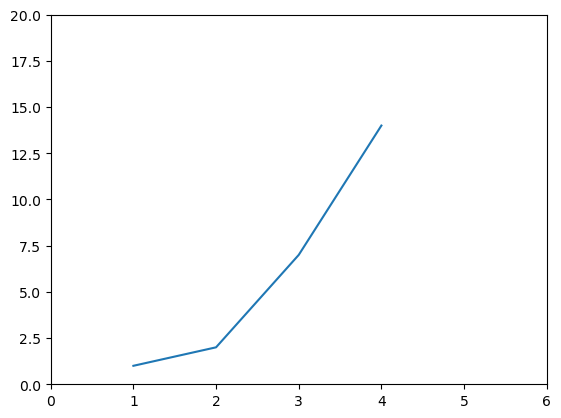

In [88]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 3, 4], [1, 2, 7, 14])
plt.axis([0, 6, 0, 20])
plt.show()

# Task 4: Custom Matplotlib Figure

For this task, I created a custom plot in Jupyter using Matplotlib. The figure shows
$\sin(x)$ and $\cos(x)$ over the interval $[0, 2\pi]$, with labels, a legend, a grid,
and an annotation of the maximum of $\sin(x)$. I include both the code and the rendered
figure below.

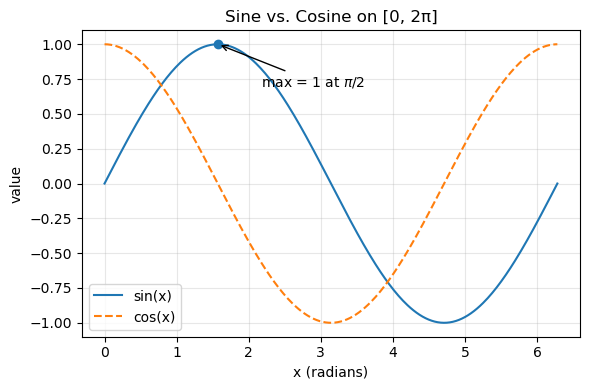

In [89]:
import numpy as np
import matplotlib.pyplot as plt

# Data
x = np.linspace(0, 2*np.pi, 300)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Create the plot
plt.figure(figsize=(6, 4))
plt.plot(x, y_sin, label="sin(x)")
plt.plot(x, y_cos, linestyle="--", label="cos(x)")

# Labels, title, legend, grid
plt.xlabel("x (radians)")
plt.ylabel("value")
plt.title("Sine vs. Cosine on [0, 2π]")
plt.legend()
plt.grid(True, alpha=0.3)

# Annotate the maximum of sin(x) at x = π/2
imax = np.argmax(y_sin)
plt.scatter([x[imax]], [y_sin[imax]])  # highlight the point
plt.annotate(
    "max = 1 at $\\pi/2$",
    xy=(x[imax], y_sin[imax]),
    xytext=(x[imax] + 0.6, 0.7),
    arrowprops=dict(arrowstyle="->")
)

plt.tight_layout()
plt.show()

# Task 5: Version Control System (GitHub) Account

**Account name:** lonzo2ingram14

# Task 6: Github Link of the Project